Part a) Ordinary Least Square (OLS) for the Runge function

In [2]:
#Starting by generating point of x in the interval [-1,1]

import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from Project1_e import lasso_gradient, run_optimizer_lasso

seed = np.random.seed(51) #setting a fixed seed for reproductability

#choosing datapoints between 1 and -1 
n = 100
x = np.linspace (-1,1, n)


#From the Runge function: for every x, compute the correspponding y
y = 1/(1 + 25 * x**2)
#Adding noise (Gaussian) with mean 0 and variance 1: N(0,1)
noise = np.random.normal(0,1,n)
y_noisy = y + 0.1 * noise


#Creating feature matrix with shape [1,x,x^2,x^3,x^4 ...]
def polynomial_features(x, p, intercept = True):
    n = len(x)
    if intercept == True: # adding functionality for intercept
        X = np.zeros((n, p + 1))
        X[:, 0] = 1  # intercept column first
        for i in range(1, p + 1): # from 1 to p inclusive
            X[:, i] = x ** i
    else: #if intercept is False
            X = np.zeros((n, p)) #no intercept column
            for i in range(p): #from 0 to p-1
                X[:, i] = x ** (i + 1) 

    return X

def OLS_parameters(X, y):
    X_T_X = np.linalg.pinv(X.T @ X)
    beta_OLS = X_T_X @ X.T @ y
    return beta_OLS

def R2_score(actual , predicted):
     numerator = np.sum((actual - predicted) ** 2) #the numerator of the r2 formula
     actual_mean = np.mean(actual) #our mean value of the actual values
     denominator = np.sum((actual - actual_mean) ** 2) #denominator of the r2 formula
     R2 = 1 - (numerator / denominator) #calculating the r2
     return R2




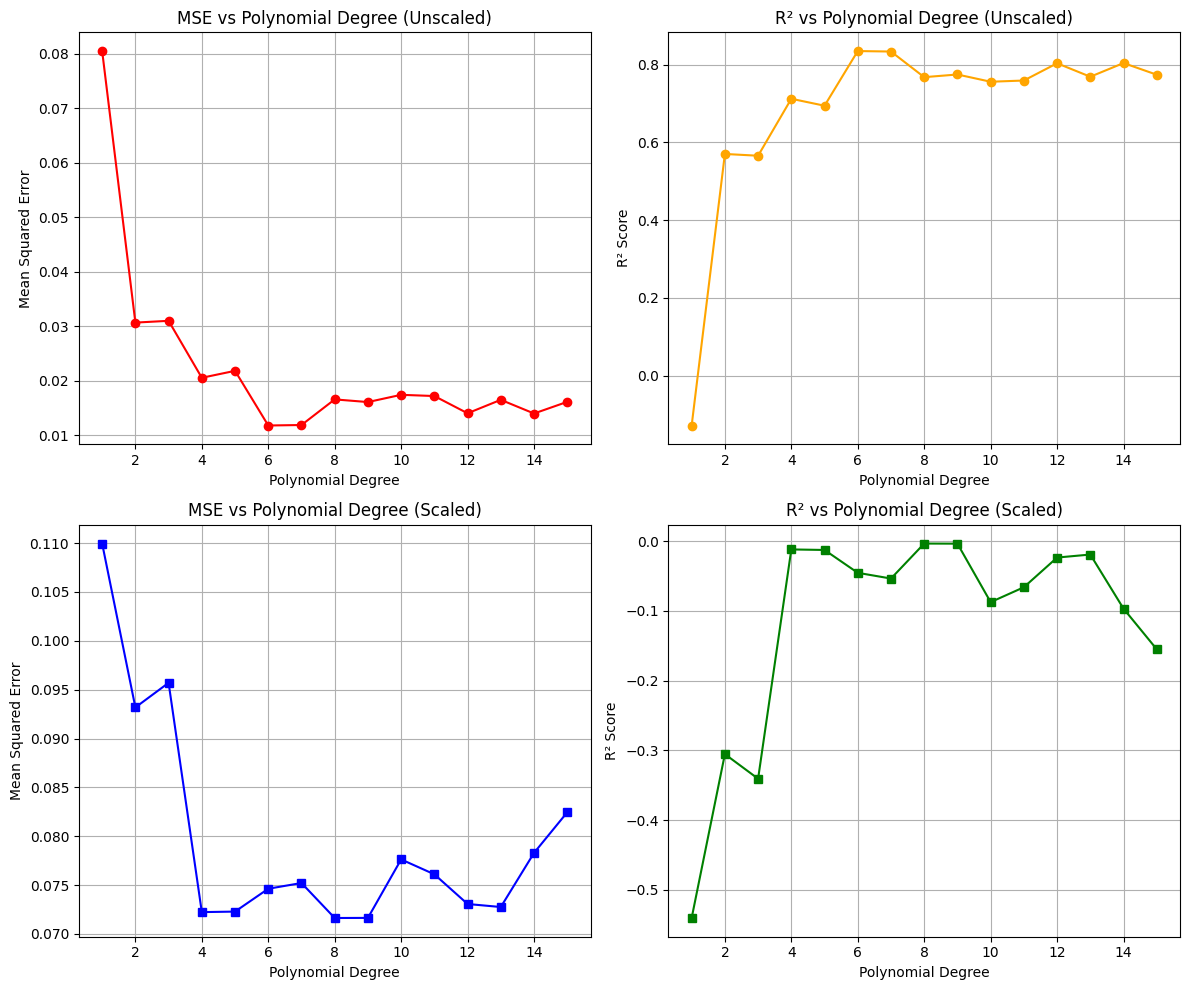

In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

mse_values_OLS_unscaled , R2_values_OLS_unscaled = np.zeros(15) ,np.zeros(15)  #storing the mse values for each polynomial degree - unscaled
mse_values_OLS_scaled , R2_values_OLS_scaled = np.zeros(15) , np.zeros(15) #storing the r2 values for each polynomial - Scaled

for i in range(1 , 16):
    #unscaled version
    X = polynomial_features(x , i)
    X_train , X_test , y_train , y_test = train_test_split(X , y_noisy , test_size = 0.2 , random_state=67) #splitting into train_test_split
    beta = OLS_parameters(X_train , y_train) #finding optimal beta
    y_pred = X_test @ beta #predicting using the training model
    mse_values_OLS_unscaled[i-1] = mean_squared_error(y_test , y_pred)
    R2_values_OLS_unscaled[i-1] = R2_score(y_test , y_pred)

    #scaled version
    '''
    Important note: We split, and then introduce the scaler because we don't want to contaminate the dataset of train with the information from test!!! 
    '''
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    beta_scaled = OLS_parameters(X_train_scaled , y_train)
    y_pred_scaled = X_test_scaled @ beta_scaled

    mse_values_OLS_scaled[i-1] = mean_squared_error(y_test , y_pred_scaled)
    R2_values_OLS_scaled[i-1] = R2_score(y_test , y_pred_scaled)





#now we create degrees array as well
degrees = np.arange(1 , 16)
plt.figure(figsize = (12 , 10))

# Unscaled MSE
plt.subplot(2 , 2 , 1)
plt.plot(degrees , mse_values_OLS_unscaled , marker = 'o', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree (Unscaled)')
plt.grid()

# Unscaled $R^2$
plt.subplot(2 , 2 , 2)
plt.plot(degrees , R2_values_OLS_unscaled , marker = 'o', color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² vs Polynomial Degree (Unscaled)')
plt.grid()

# Scaled MSE
plt.subplot(2 , 2 , 3)
plt.plot(degrees , mse_values_OLS_scaled , marker = 's', color='blue')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree (Scaled)')
plt.grid()

# Scaled R^2
plt.subplot(2 , 2 , 4)
plt.plot(degrees , R2_values_OLS_scaled , marker = 's', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² vs Polynomial Degree (Scaled)')
plt.grid()

plt.tight_layout()
plt.show()

In [4]:
#Here we also want to be able to have a dependency

### b)

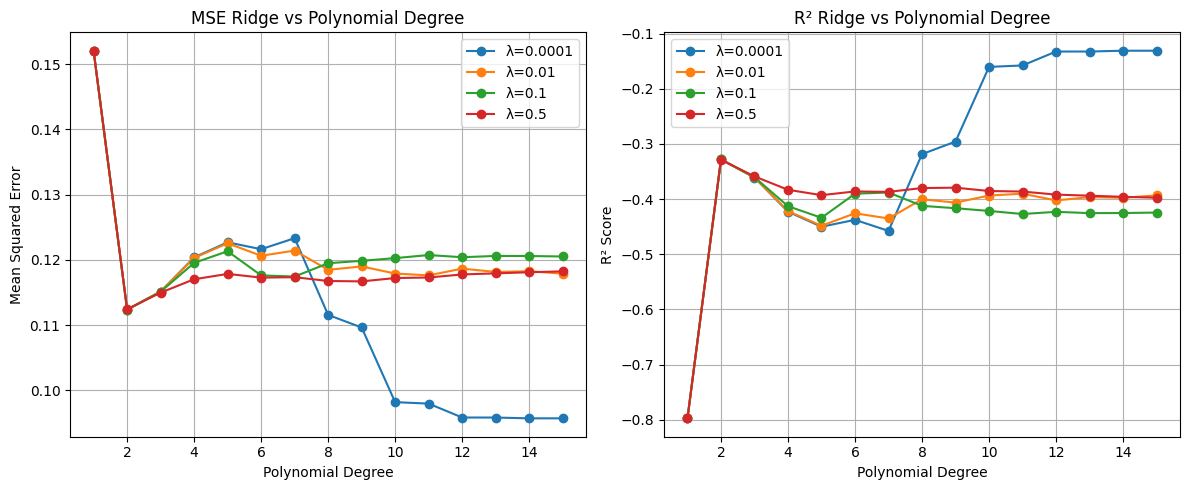

In [5]:
def ridge_regression(X , y , lamb):
    I = np.identity(X.shape[1]) # need to have the identity matrix
    return (np.linalg.inv(X.T @ X + lamb * I) @ X.T @ y) #the actual expression for optimal beta

#setting differing values for lambda
lambd = [0.0001 , 0.01 , 0.1 , 0.5]

mse_values_ridge = np.zeros((15 , len(lambd))) #defining the mse values matrix
R2_values_ridge = np.zeros((15, len(lambd))) #R2 matrix for storage

for l in range(len(lambd)): #we want to test for all lambdas
    for i in range(1 , 16): #we want to test for teh different polynomials
        X = polynomial_features(x , i)
        X_train , X_test , y_train , y_test = train_test_split(X , y_noisy , test_size = 0.2 , random_state= 60) #split the data
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        beta_ridge = ridge_regression(X_train , y_train , lambd[l]) #do the ridge regression
        y_pred_ridge = X_test @ beta_ridge #do the prediction

        mse_values_ridge[i-1, l ] = mean_squared_error(y_test , y_pred_ridge) #calculate the mse values
        R2_values_ridge[i-1 , l] = R2_score(y_test , y_pred_ridge) #calculate the r2 values




plt.figure(figsize=(12, 5))

# ---- MSE plot ----
plt.subplot(1, 2, 1)
for l in range(len(lambd)):
    plt.plot(degrees, mse_values_ridge[:, l], marker='o', label=f"λ={lambd[l]}")
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE Ridge vs Polynomial Degree')
plt.legend()
plt.grid()

# ---- R² plot ----
plt.subplot(1, 2, 2)
for l in range(len(lambd)):
    plt.plot(degrees, R2_values_ridge[:, l], marker='o', label=f"λ={lambd[l]}")
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Ridge vs Polynomial Degree')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

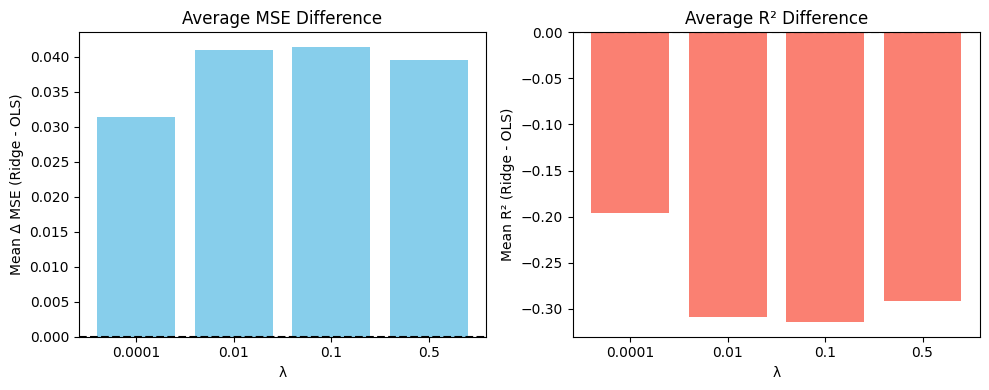

In [6]:
difference_mse = np.zeros((15 , 4))
difference_r2 = np.zeros((15 , 4))
for j in range(len(lambd)):
    for i in range(1 , 16):
        difference_mse[i-1, j] = mse_values_ridge[i-1, j] - mse_values_OLS_scaled[i-1]
        difference_r2[i-1 , j] = R2_values_ridge[i-1 , j] - R2_values_OLS_scaled[i-1]


mean_diff_mse = np.mean(difference_mse, axis=0)   # one value per λ
mean_diff_r2  = np.mean(difference_r2, axis=0)    # one value per λ

plt.figure(figsize=(10,4))

# ---- Mean difference in MSE ----
plt.subplot(1,2,1)
plt.bar([str(l) for l in lambd], mean_diff_mse, color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("λ")
plt.ylabel("Mean Δ MSE (Ridge - OLS)")
plt.title("Average MSE Difference")

# ---- Mean difference in R² ----
plt.subplot(1,2,2)
plt.bar([str(l) for l in lambd], mean_diff_r2, color='salmon')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("λ")
plt.ylabel("Mean R² (Ridge - OLS)")
plt.title("Average R² Difference")

plt.tight_layout()
plt.show()


Part c) Implement code for Gradient descent

Gradient Descent OLS coefficients: [ 5.77864122e-01  4.10316312e-18 -1.25407648e+00  8.17745936e-18
  1.45766126e-01  6.07950105e-17  3.20176577e-01  2.11271701e-17
  2.44864813e-01 -7.07862046e-18  1.33298252e-01 -3.65971088e-17
  3.24457364e-02 -6.34643163e-17 -4.96895394e-02 -8.66846742e-17]
Gradient Descent Ridge coefficients: [ 3.37996695e-01 -7.77179000e-18 -2.13104971e-01  5.36142813e-18
 -9.35795196e-02  2.84661771e-18 -4.10945795e-02  5.50671418e-18
 -1.62887670e-02  6.57331848e-18 -3.30155522e-03  7.01307502e-18
  4.02111244e-03  7.87060861e-18  8.36576486e-03  7.82571095e-18]
Closed-form OLS: [ 9.53707258e-01 -5.13904133e-08 -1.46925184e+01  1.88277657e-06
  1.16264028e+02 -2.01420242e-05 -4.83031092e+02  9.55286306e-05
  1.10310222e+03 -2.33339352e-04 -1.39261907e+03  3.05821289e-04
  9.10192434e+02 -2.04348152e-04 -2.40144266e+02  5.46493738e-05]
Closed-form Ridge: [ 6.26981867e-01 -3.15893145e-15 -1.90011108e+00  2.32565703e-14
  1.00350121e+00 -3.53155005e-14  7.08782716

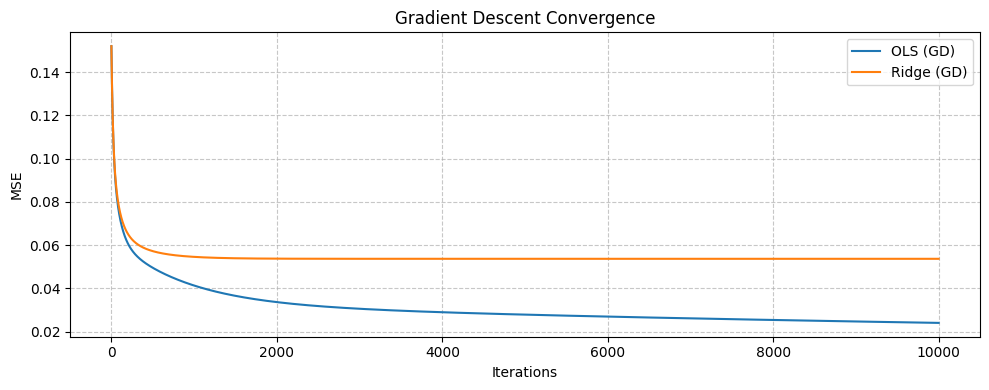

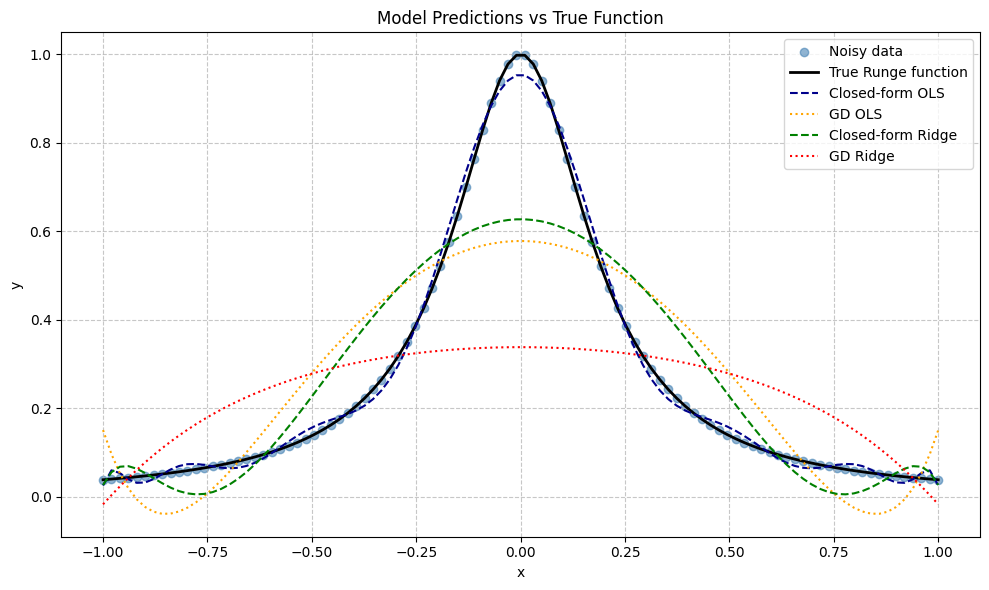

In [7]:
eta = 0.01
num_iters = 10000
lam = 0.1

n_samples, n_features = X.shape

# Initialize parameters to zero
theta_gdOLS = np.zeros(n_features)
theta_gdRidge = np.zeros(n_features)

def ols_gradient(X, y, theta):
    return (2/n_samples) * X.T @ (X @ theta - y)

def ridge_gradient(X, y, theta, lam):
    return (2/n_samples) * X.T @ (X @ theta - y) + 2 * lam * theta

# Track MSE
ols_loss = []
ridge_loss = []

for t in range(num_iters):
    grad_OLS = ols_gradient(X, y, theta_gdOLS)
    grad_Ridge = ridge_gradient(X, y, theta_gdRidge, lam)

    theta_gdOLS   -= eta * grad_OLS
    theta_gdRidge -= eta * grad_Ridge

    ols_loss.append(np.mean((y - X @ theta_gdOLS) ** 2))
    ridge_loss.append(np.mean((y - X @ theta_gdRidge) ** 2))

print("Gradient Descent OLS coefficients:", theta_gdOLS)
print("Gradient Descent Ridge coefficients:", theta_gdRidge)

#Closed-form solution
def OLS_parameters(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def Ridge_parameters(X, y, lam):
    I = np.eye(X.shape[1])
    return np.linalg.inv(X.T @ X + lam * I) @ X.T @ y

theta_closed_formOLS   = OLS_parameters(X, y)
theta_closed_formRidge = Ridge_parameters(X, y, lam)

print("Closed-form OLS:", theta_closed_formOLS)
print("Closed-form Ridge:", theta_closed_formRidge)

#plot GD Convergience
plt.figure(figsize=(10, 4))
plt.plot(range(num_iters), ols_loss, label='OLS (GD)')
plt.plot(range(num_iters), ridge_loss, label='Ridge (GD)')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Gradient Descent Convergence')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plot Model Predictions vs True Function
y_pred_OLS_gd       = X @ theta_gdOLS
y_pred_Ridge_gd     = X @ theta_gdRidge
y_pred_OLS_closed   = X @ theta_closed_formOLS
y_pred_Ridge_closed = X @ theta_closed_formRidge

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='steelblue', alpha=0.6, label='Noisy data')
plt.plot(x, y, color='black', linewidth=2, label='True Runge function')
plt.plot(x, y_pred_OLS_closed, '--', color='darkblue', label='Closed-form OLS')
plt.plot(x, y_pred_OLS_gd, ':', color='orange', label='GD OLS')
plt.plot(x, y_pred_Ridge_closed, '--', color='green', label='Closed-form Ridge')
plt.plot(x, y_pred_Ridge_gd, ':', color='red', label='GD Ridge')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Predictions vs True Function')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()










=== Lasso Regression (Gradient Descent) ===
λ=0.001 : MSE=0.1209, R²=-0.4284
λ=0.01  : MSE=0.1210, R²=-0.4296
λ=0.1   : MSE=0.1259, R²=-0.4880
λ=1     : MSE=0.1518, R²=-0.7938


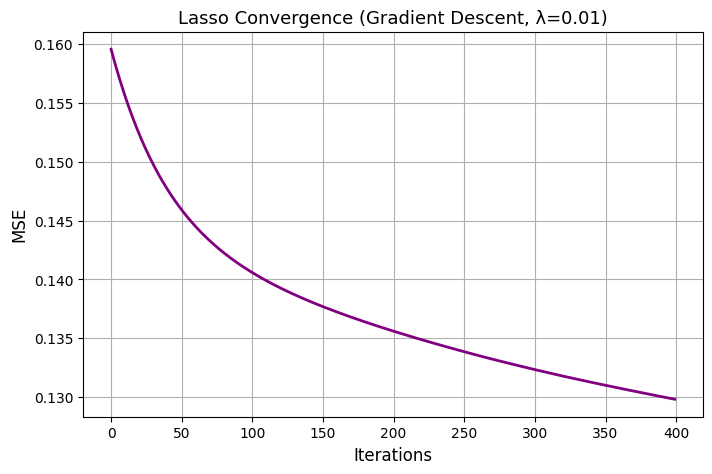

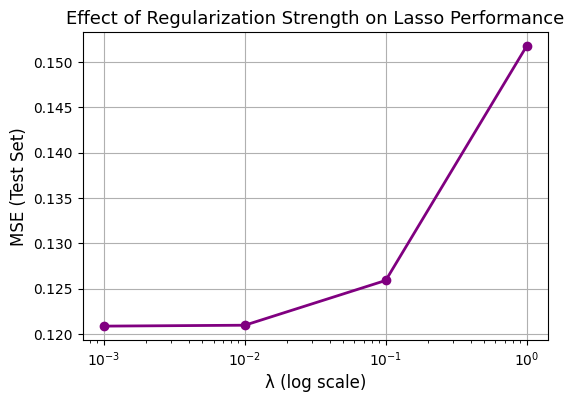

In [ ]:
# Part E : plotting
#regularization strengths to test
lambdas = [0.001, 0.01, 0.1, 1]

# Store results for each λ
results = {}

print("=== Lasso Regression (Gradient Descent) ===")
for lam in lambdas:
    theta, mse_val = run_optimizer_lasso("GD", X_train, y_train, lam=lam)
    y_pred = X_test @ theta

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[lam] = (mse_val, mse, r2)

    print(f"λ={lam:<6}: MSE={mse:.4f}, R²={r2:.4f}")

# Plot MSE convergence for one example λ 
example_lambda = 0.01
plt.figure(figsize=(8, 5))
plt.plot(results[example_lambda][0], color='purple', linewidth=2)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title(f'Lasso Convergence (Gradient Descent, λ={example_lambda})', fontsize=13)
plt.grid(True)
plt.show()

# Plot MSE vs λ 
mse_values = [results[lam][1] for lam in lambdas]

plt.figure(figsize=(6, 4))
plt.plot(lambdas, mse_values, marker='o', color='purple', linewidth=2)
plt.xscale('log')
plt.xlabel('λ (log scale)', fontsize=12)
plt.ylabel('MSE (Test Set)', fontsize=12)
plt.title('Effect of Regularization Strength on Lasso Performance', fontsize=13)
plt.grid(True)
plt.show()